In [2]:
# 라이브러리 불러오기

import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [3]:
# 데이터 읽기

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [5]:
# 하이퍼파라미터

iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

In [6]:
# 학습 과정

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.10228333333333334, 0.1013
train acc, test acc | 0.7912, 0.796
train acc, test acc | 0.87905, 0.8805
train acc, test acc | 0.8985833333333333, 0.9019
train acc, test acc | 0.9075333333333333, 0.9106
train acc, test acc | 0.9130166666666667, 0.9159
train acc, test acc | 0.9192166666666667, 0.9206
train acc, test acc | 0.9231833333333334, 0.9249
train acc, test acc | 0.9273333333333333, 0.9278
train acc, test acc | 0.93015, 0.929
train acc, test acc | 0.9334666666666667, 0.9324
train acc, test acc | 0.9365, 0.9347
train acc, test acc | 0.9385, 0.9378
train acc, test acc | 0.94055, 0.939
train acc, test acc | 0.9435833333333333, 0.9423
train acc, test acc | 0.9453666666666667, 0.9431
train acc, test acc | 0.9463166666666667, 0.9441


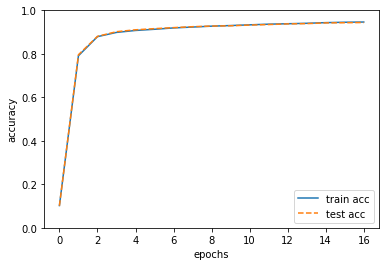

In [7]:
# 그래프 그리기

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()